In [1]:
!pip install -q diffusers transformers accelerate pillow torch clip-interrogator==0.6.0

import torch
import io
from PIL import Image
from google.colab import files
from transformers import BlipProcessor, BlipForConditionalGeneration
from clip_interrogator import Config, Interrogator
from diffusers import StableDiffusionImg2ImgPipeline

# Load models once
@torch.no_grad()
def load_models():
    blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
    blip_model = BlipForConditionalGeneration.from_pretrained(
        "Salesforce/blip-image-captioning-large",
        torch_dtype=torch.float16
    ).to("cuda")

    ci = Interrogator(Config(
        clip_model_name="ViT-L-14/openai",
        device="cuda"
    ))

    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        "nitrosocke/Ghibli-Diffusion",
        torch_dtype=torch.float16
    ).to("cuda")
    pipe.enable_attention_slicing()
    pipe.enable_model_cpu_offload()

    return blip_processor, blip_model, ci, pipe

# Initialize and keep models in memory
blip_processor, blip_model, ci, pipe = load_models()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.8/787.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Loading caption model blip-large...
Loading CLIP model ViT-L-14/openai...


open_clip_model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 101MB/s] 
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:00<00:00, 243MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 29.4MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 34.2MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 32.0MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 35.8MB/s]


Loaded CLIP model and data in 44.92 seconds.


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Saving class_ki_photo.jpg to class_ki_photo.jpg


/usr/local/lib/python3.11/dist-packages/clip_interrogator/clip_interrogator.py:200: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/clip_interrogator/clip_interrogator.py:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
100%|██████████| 50/50 [00:00<00:00, 192.24it/s]


  0%|          | 0/31 [00:00<?, ?it/s]

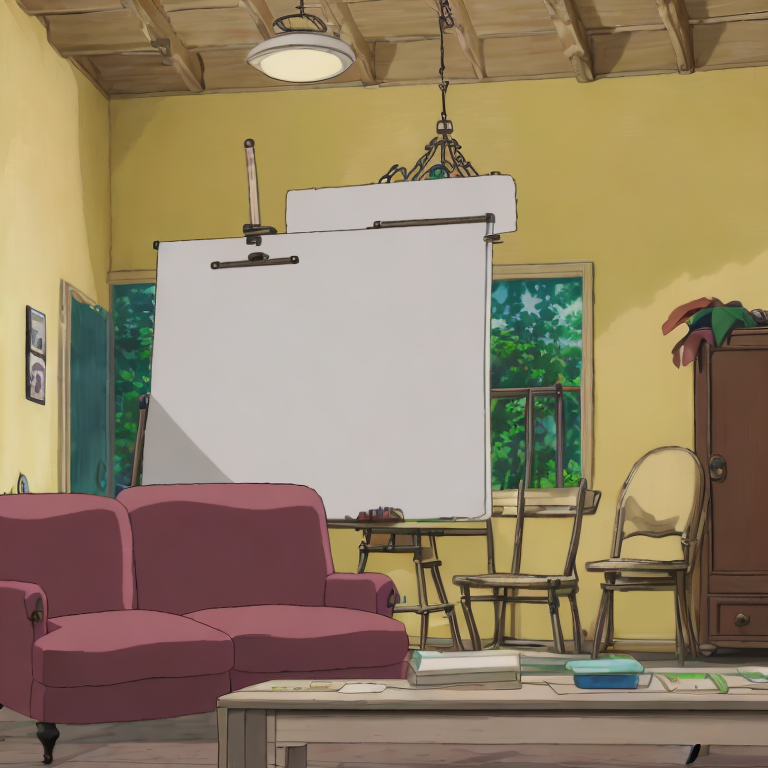

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
def process_single_image():
    # Upload and process one image
    uploaded = files.upload()
    if not uploaded:
        return print("No image uploaded!")

    # Load image
    data = next(iter(uploaded.values()))
    img = Image.open(io.BytesIO(data)).convert("RGB").resize((768, 768))

    # Generate prompt
    inputs = blip_processor(img, return_tensors="pt").to("cuda", torch.float16)
    caption = blip_model.generate(**inputs, max_new_tokens=50)[0]
    content_desc = blip_processor.decode(caption, skip_special_tokens=True)

    style_terms = ci.interrogate_classic(img)
    style_keywords = [term for term in style_terms.split(', ')
                    if any(kw in term.lower() for kw in ['ghibli', 'anime'])]

    prompt = f"Studio Ghibli style: {content_desc}. Features: {', '.join(style_keywords)}"

    # Generate image
    with torch.autocast("cuda"), torch.inference_mode():
        result = pipe(
            prompt=prompt,
            image=img,
            strength=0.7,
            guidance_scale=10,
            num_inference_steps=45
        ).images[0]

    # Show and save
    display(result)
    result.save("latest_ghibli_output.jpg")
    files.download("latest_ghibli_output.jpg")

    # Cleanup
    del img, result
    torch.cuda.empty_cache()

# Run processing
process_single_image()

Saving landscape_ki_photo.jpg to landscape_ki_photo.jpg


100%|██████████| 50/50 [00:00<00:00, 119.90it/s]


  0%|          | 0/31 [00:00<?, ?it/s]

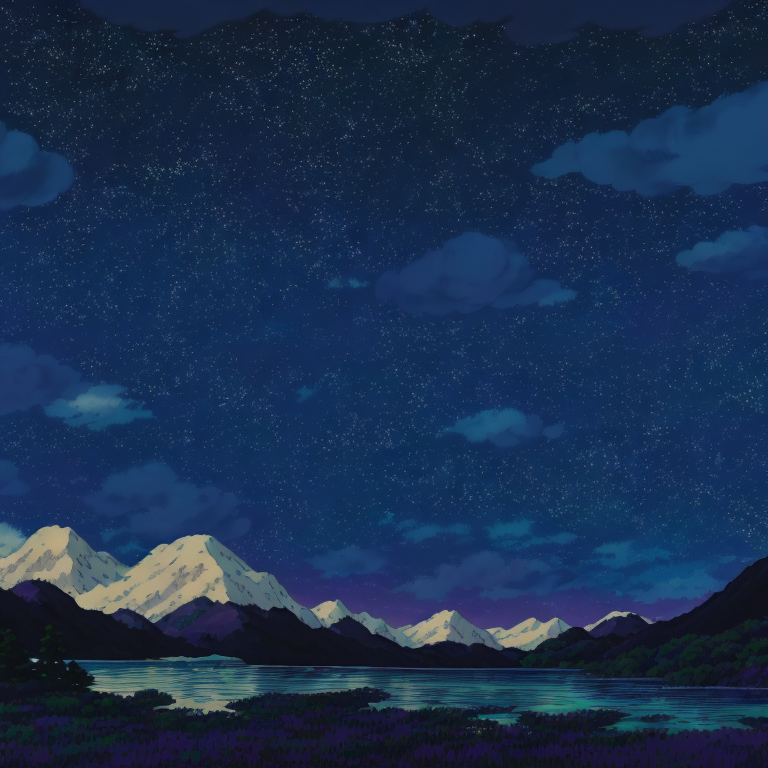

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving landscape_ki_ek_aur_photo.jpg to landscape_ki_ek_aur_photo.jpg


100%|██████████| 50/50 [00:00<00:00, 180.23it/s]


  0%|          | 0/31 [00:00<?, ?it/s]

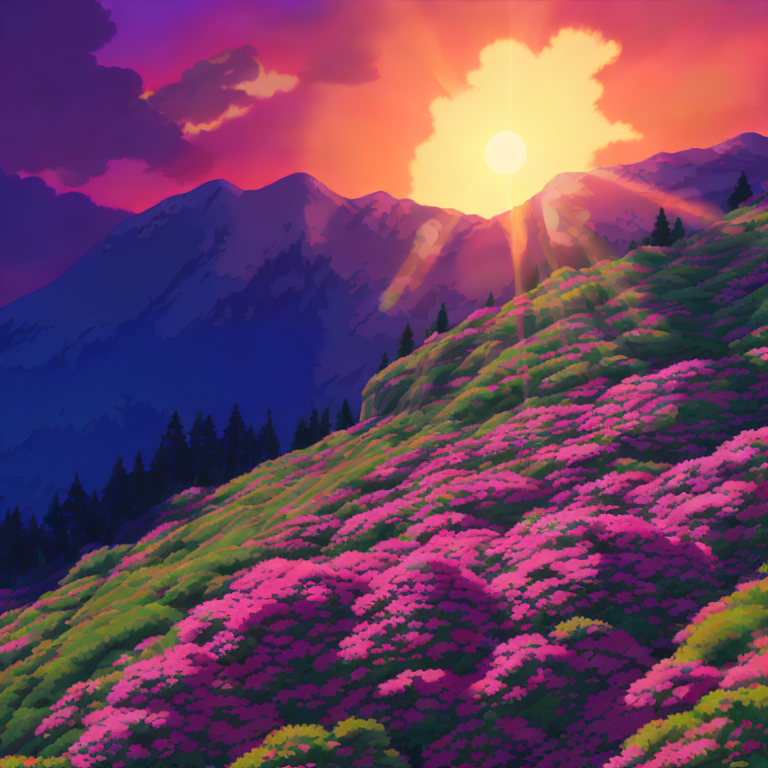

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving city_view_landscape.jpg to city_view_landscape.jpg


100%|██████████| 50/50 [00:00<00:00, 173.11it/s]


  0%|          | 0/31 [00:00<?, ?it/s]

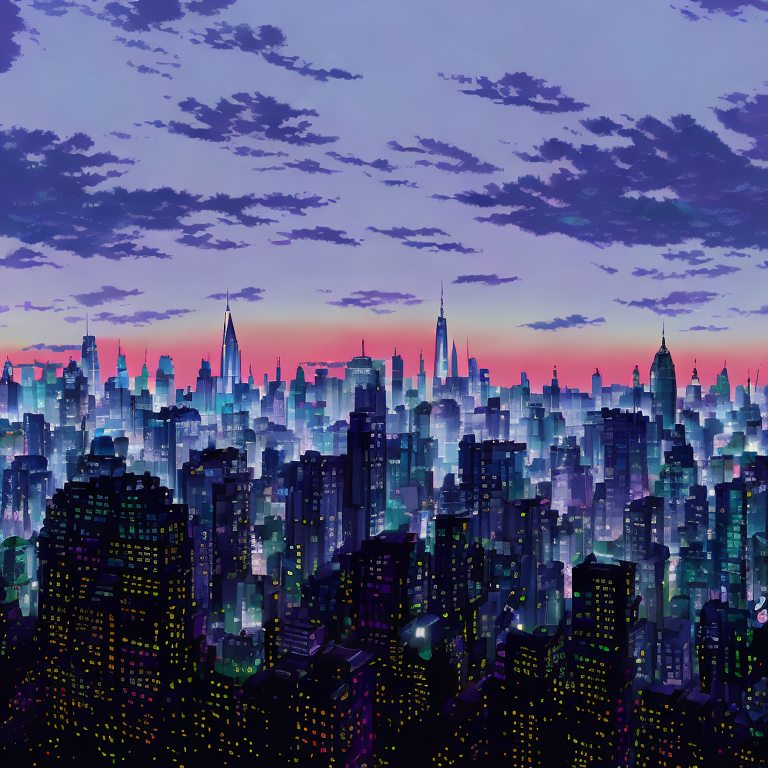

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>